# About the data:

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

# Getting started with the data:

1. Getting the data

In [1]:
import pandas as pd

In [2]:
data_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz")

2. Getting the basic overview of dataset

In [3]:
# Checking the head of the data frame
data_set.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
# Checking the info of data_set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
# Decscibing the numerical values of the data set
data_set.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
# Including the "object" type columns
data_set.describe(include = "object")

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


### Overview of above cell(output):

* we have 12 categories of `holidays`. Out of 48204, 48143 are **None**.
* we have 11 categories of `weather_main`. Out of 48204, 15164 are **Clouds**.
* we have 38 sub-categories of  `wether_main` called `weather_description`. Out of 48204, 11665 are **Sky is clear**.

# Exploratory Data Analysis

Before heading on to the EDA, let's check the data_set again and try to describe each column

In [7]:
data_set.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


**holiday :** `Categorical`, US National holidays plus regional holiday, Minnesota State Fair.

**temp :** `Numeric`, Average temp in kelvin.

**rain_1h :** `Numeric`, Amount in mm of rain that occurred in the hour.

**snow_1h :** `Numeric`, Amount in mm of snow that occurred in the hour.

**clouds_all :** `Numeric`, Percentage of cloud cover.

**weather_main :** `Categorical`, Short textual description of the current weather.

**weather_description :** `Categorical`, Longer textual description of current weather.

**date_time :** `DateTime`, Hour of the data collected in local CST time.

**traffic_volume :** `Numeric`, Hourly I-94 ATR 301 reported westbound traffic volume.

In [8]:
# Let's check the course of the data collected:
max_year = pd.to_datetime(data_set["date_time"].max()).year
min_year = pd.to_datetime(data_set["date_time"].min()).year
print(f"Total year(s): {max_year - min_year}")

Total year(s): 6


So the data is colled over a period of 6 years

### Now let's start plotting some graphs to get a better understanding of dataset

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

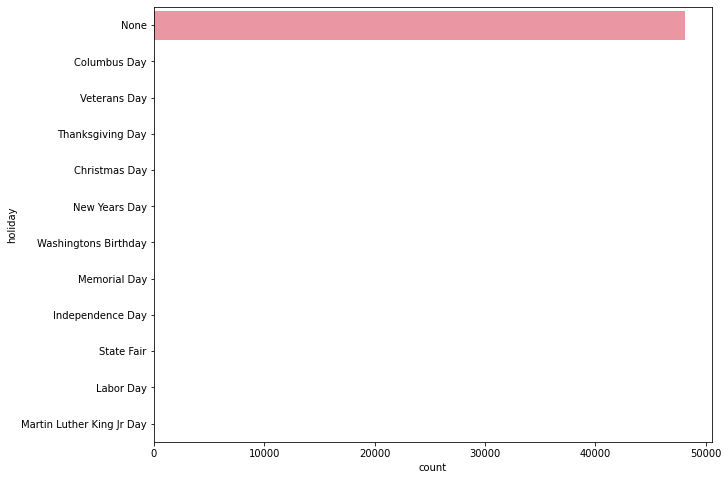

In [10]:
# Let's start with "holiday"
plt.figure(figsize = (10, 8))
sns.countplot(y = data_set["holiday"]);

As None: normal days dominates the other holidays, let's remove the None data to visualize the impact/count of others

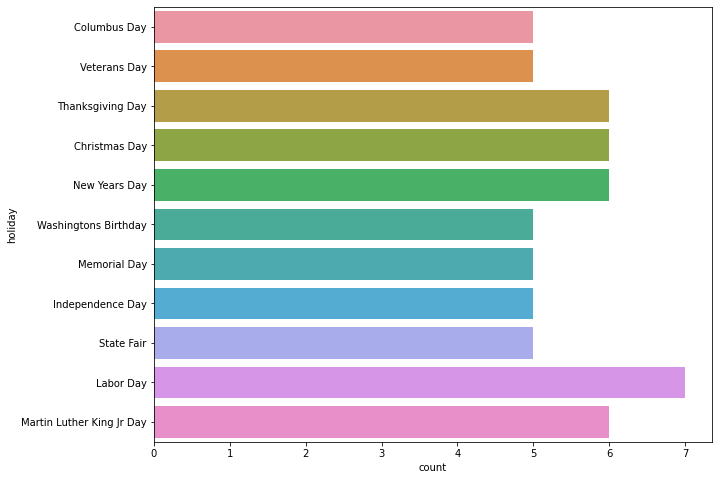

In [11]:
plt.figure(figsize = (10, 8))
holidays_none_removed = data_set[data_set['holiday'] != "None"]
sns.countplot(y = "holiday", data = holidays_none_removed);

Seems like the count of other holidays is very less as compared to normal days, so let's convert all the holidays into one single category called "holiday" later

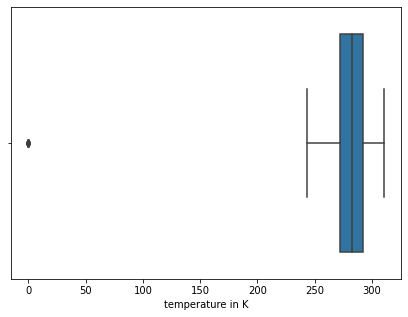

In [12]:
# Moving on to temperature
plt.figure(figsize = (7, 5))
sns.boxplot(x = "temp", data = data_set)
plt.xlabel("temperature in K");

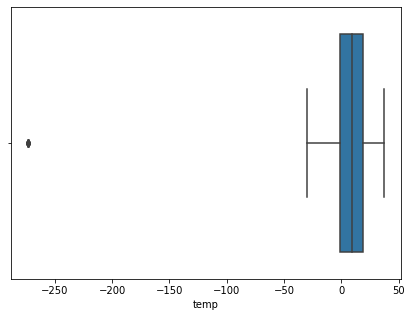

In [13]:
# Here, the temperature is in Kelvin(K) let's convert it onto Celsius and plot it again
temp_in_celcius = data_set["temp"].apply(lambda x: x - 273.15)
plt.figure(figsize = (7, 5))
sns.boxplot(x = temp_in_celcius);

Hmm, as we can see, some of the temperature is pointing to absolute zero which, is not possible and can be a faulty recording!

We will remove these recording/rows so that it won't affect the final result

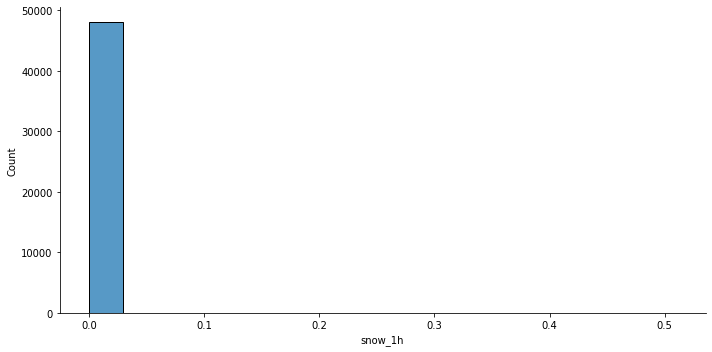

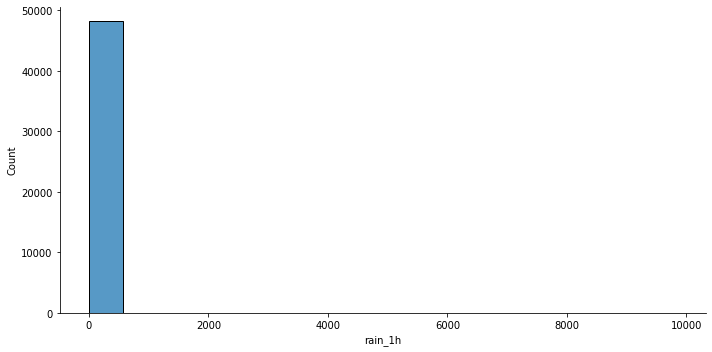

In [14]:
# Now let's check `Snow` and `Rain`
sns.displot(data_set["snow_1h"], height = 5, aspect=2);
sns.displot(data_set["rain_1h"], height = 5, aspect = 2);

As it can be seen from the above plots that the `snow_1h` and `rain_1h` are more concentrated towards `0` and so the distribution is skewed.

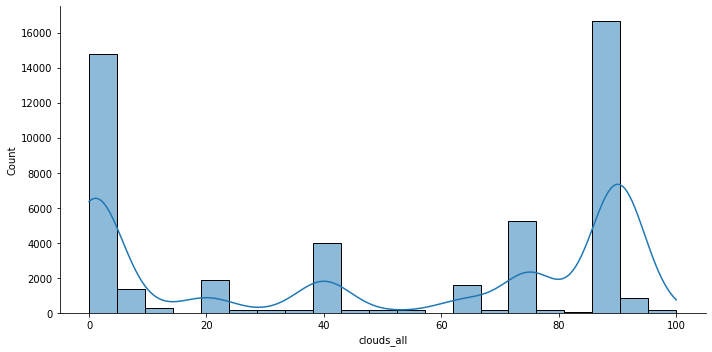

In [15]:
# Moving on to clouds
sns.displot(data_set["clouds_all"], height = 5, aspect = 2, kde = True)

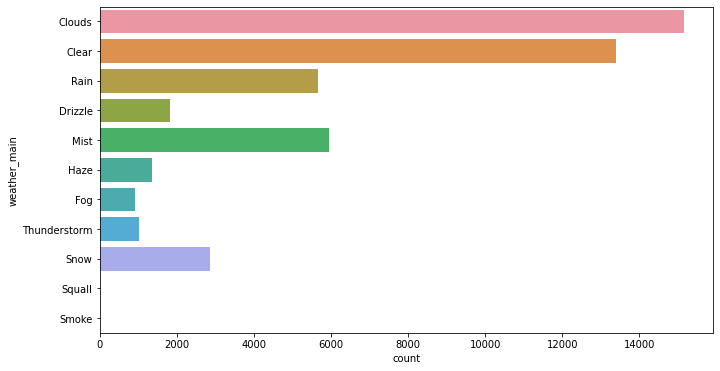

In [16]:
# Let's check the Weather Main
plt.figure(figsize = (11, 6))
sns.countplot(y = data_set["weather_main"]);

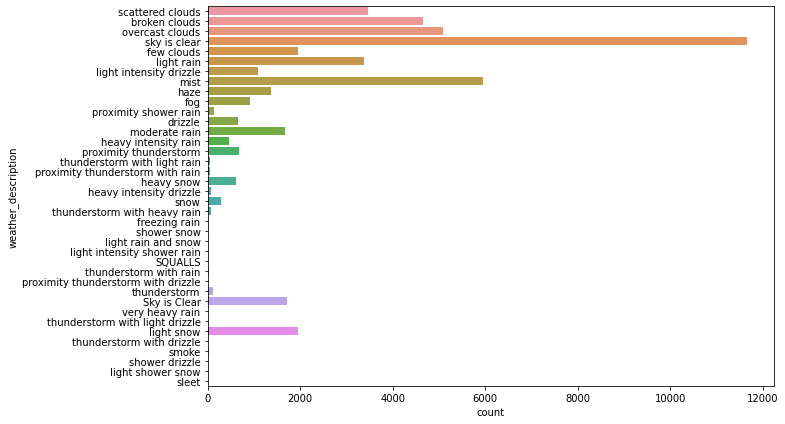

In [17]:
plt.figure(figsize = (11, 6))
sns.countplot(y = data_set["weather_description"]);
plt.tight_layout()

In [18]:
c_mat = pd.crosstab(data_set["weather_main"], data_set["weather_description"])
c_mat.corr(method = "spearman").style.background_gradient(cmap = "coolwarm")

weather_description,SQUALLS,Sky is Clear,broken clouds,drizzle,few clouds,fog,freezing rain,haze,heavy intensity drizzle,heavy intensity rain,heavy snow,light intensity drizzle,light intensity shower rain,light rain,light rain and snow,light shower snow,light snow,mist,moderate rain,overcast clouds,proximity shower rain,proximity thunderstorm,proximity thunderstorm with drizzle,proximity thunderstorm with rain,scattered clouds,shower drizzle,shower snow,sky is clear,sleet,smoke,snow,thunderstorm,thunderstorm with drizzle,thunderstorm with heavy rain,thunderstorm with light drizzle,thunderstorm with light rain,thunderstorm with rain,very heavy rain
weather_description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SQUALLS,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
Sky is Clear,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
broken clouds,-0.100000,-0.100000,1.000000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
drizzle,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
few clouds,-0.100000,-0.100000,1.000000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
fog,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
freezing rain,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,1.000000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000
haze,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
heavy intensity drizzle,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0

Although some of the categories help us to predict the correct traffic volume but they are just an extention of `weather_main` so let's drop this column a little later.

## After EDA, let's head on to the Data Cleaning process

In [19]:
# Firstly, convert every category of holiday into one single category ie... 'holiday' or None
def convert_holiday(holiday: str) -> str:
    category = "None"

    if holiday != "None":
        return "Holiday"
    
    return category

In [20]:
data_set['holiday'] = data_set['holiday'].map(convert_holiday)
data_set['holiday'].unique()

array(['None', 'Holiday'], dtype=object)

In [21]:
# Now convert the date_time
def convert_to_date_time(data_set: pd.DataFrame, datetime: str) -> pd.DataFrame:
    data_set[datetime] = pd.to_datetime(data_set[datetime])
    data_set['Year'] = data_set[datetime].dt.year
    data_set['Month'] = data_set[datetime].dt.month
    data_set['Weekday'] = data_set[datetime].dt.weekday
    data_set['Hour'] = data_set[datetime].dt.hour

In [22]:
# Check for duplicated before converting!
data_set.duplicated().sum()

17

In [23]:
# Seems like there are some duplicates, let's remove them and re-check
data_set.drop_duplicates(inplace = True)
data_set.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48199    False
48200    False
48201    False
48202    False
48203    False
Length: 48187, dtype: bool

In [24]:
# After removing duplicates, let's convert date_time to required format
convert_to_date_time(data_set, "date_time")
data_set.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Weekday,Hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,1,13


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Year,Month,Weekday,Hour
date_time,,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,1,9
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,1,10
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,1,11
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,1,12
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,1,13


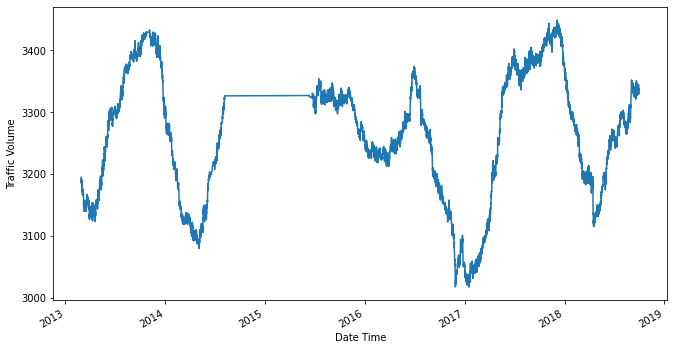

In [25]:
# SEtting date-time as the index of dataset
data_set.set_index('date_time', inplace = True)

# Taking 4000 values at a time to get the overview of traffic volume over years and plotting it.
data_set.sort_index()['traffic_volume'].rolling(4000).mean().plot(figsize = (11, 6))
plt.xlabel("Date Time")
plt.ylabel("Traffic Volume")
data_set.head()

In [26]:
# As explained earlier, its time to remove `weather description` column
data_set.drop(["weather_description"], axis = 1, inplace = True)
data_set.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,Year,Month,Weekday,Hour
date_time,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,5545,2012,10,1,9
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,4516,2012,10,1,10
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,4767,2012,10,1,11
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,5026,2012,10,1,12
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,4918,2012,10,1,13


In [27]:
data_set['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [28]:
# As it can be seen above that weather_main contains relevent information about rain and snow and columns ['rain_1h', 'snow_1h'] contains all
# the values concentrated around 0, so we are going to remove them from the data_set.
data_set.drop(['rain_1h', 'snow_1h'], axis = 1, inplace = True)
data_set.head()

,holiday,temp,clouds_all,weather_main,traffic_volume,Year,Month,Weekday,Hour
date_time,,,,,,,,,
2012-10-02 09:00:00,None,288.28,40,Clouds,5545,2012,10,1,9
2012-10-02 10:00:00,None,289.36,75,Clouds,4516,2012,10,1,10
2012-10-02 11:00:00,None,289.58,90,Clouds,4767,2012,10,1,11
2012-10-02 12:00:00,None,290.13,90,Clouds,5026,2012,10,1,12
2012-10-02 13:00:00,None,291.14,75,Clouds,4918,2012,10,1,13


In [29]:
# Splitting the data into Features/Labels
features = data_set.drop("traffic_volume", axis = 1).copy()
labels = data_set['traffic_volume'].copy()

In [30]:
# Check the head of Features
features.head()

,holiday,temp,clouds_all,weather_main,Year,Month,Weekday,Hour
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,40,Clouds,2012,10,1,9
2012-10-02 10:00:00,None,289.36,75,Clouds,2012,10,1,10
2012-10-02 11:00:00,None,289.58,90,Clouds,2012,10,1,11
2012-10-02 12:00:00,None,290.13,90,Clouds,2012,10,1,12
2012-10-02 13:00:00,None,291.14,75,Clouds,2012,10,1,13


In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48187 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       48187 non-null  object 
 1   temp          48187 non-null  float64
 2   clouds_all    48187 non-null  int64  
 3   weather_main  48187 non-null  object 
 4   Year          48187 non-null  int64  
 5   Month         48187 non-null  int64  
 6   Weekday       48187 non-null  int64  
 7   Hour          48187 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.3+ MB


In [32]:
# Label encoding the features with datatype: 'object'

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded_features = features.copy()

for column in label_encoded_features.columns:
    if label_encoded_features[column].dtype == 'object':
        label_encoded_features[column] = le.fit_transform(label_encoded_features[column])

label_encoded_features.head()

,holiday,temp,clouds_all,weather_main,Year,Month,Weekday,Hour
date_time,,,,,,,,
2012-10-02 09:00:00,1,288.28,40,1,2012,10,1,9
2012-10-02 10:00:00,1,289.36,75,1,2012,10,1,10
2012-10-02 11:00:00,1,289.58,90,1,2012,10,1,11
2012-10-02 12:00:00,1,290.13,90,1,2012,10,1,12
2012-10-02 13:00:00,1,291.14,75,1,2012,10,1,13


In [33]:
# One-hot encoding the features

one_hot_encoded_features = features.copy()
one_hot_encoded_features[['Year', 'Month', 'Weekday']] = features[['Year', 'Month', 'Weekday']].astype("category")
one_hot_encoded_features = pd.get_dummies(one_hot_encoded_features)
one_hot_encoded_features.head()

,temp,clouds_all,Hour,holiday_Holiday,holiday_None,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,...,Month_10,Month_11,Month_12,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,40,9,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2012-10-02 10:00:00,289.36,75,10,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2012-10-02 11:00:00,289.58,90,11,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2012-10-02 12:00:00,290.13,90,12,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2012-10-02 13:00:00,291.14,75,13,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [34]:
# Before applying any algorithm to the data_set, let's check which features contributes more in predicting the right traffic volume ie... which features are more important
# Checking for the label-encoded features

from sklearn.ensemble import RandomForestRegressor
import numpy as np
model = RandomForestRegressor(max_depth = 10)
model.fit(label_encoded_features, labels)

feature_columns = features.columns
importance = model.feature_importances_
indices = np.argsort(importance)[-5:]

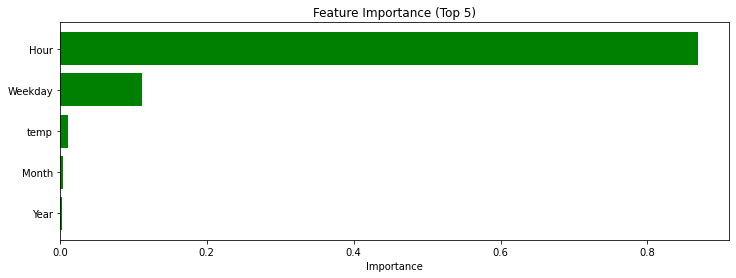

In [35]:
# Plotting the top 5 important features
plt.figure(figsize = (12, 4))
plt.barh(range(len(indices)), importance[indices], color = 'g', align = 'center')
plt.yticks(range(len(indices)), [feature_columns[i] for i in indices])
plt.xlabel("Importance")
plt.title("Feature Importance (Top 5)");

In [36]:
# Checking for One-hot encoded features
model = RandomForestRegressor(max_depth = 10)
model.fit(one_hot_encoded_features, labels)

feature_columns = one_hot_encoded_features.columns
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]

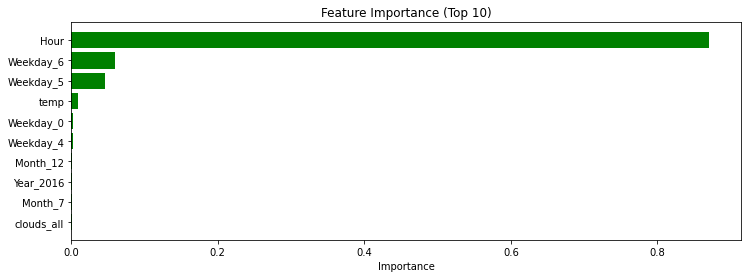

In [37]:
# Plotting the top 10 important features
plt.figure(figsize = (12, 4))
plt.barh(range(len(indices)), importance[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feature_columns[i] for i in indices])
plt.xlabel("Importance")
plt.title("Feature Importance (Top 10)");

Now it is clear from the above plots that `Hour` is the most important feature that contributes most in predicting traffic_volume.

This is because traffic is more during the rush hour.

# Scaling the features

Scaling the target value is a good idea in regression modelling scaling of the data makes it easy for a model to learn and understand the problem.

If the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

In [38]:
# Using the Label_encoded features for training and testing

from sklearn.preprocessing import scale
X = label_encoded_features.values
X = scale(X)

y = labels.values

In [39]:
# Check finally before begain with modelling
print(f"Data: {X}\n")
print(f"Shape: {X.shape}")


Data: [[ 0.03560205  0.53041592 -0.24004863 ...  1.02779521 -0.98947829
  -0.34548099]
 [ 0.03560205  0.61138394  0.65704665 ...  1.02779521 -0.98947829
  -0.20139502]
 [ 0.03560205  0.62787742  1.04151605 ...  1.02779521 -0.98947829
  -0.05730906]
 ...
 [ 0.03560205  0.11433026  1.04151605 ...  0.73369913  1.50301966
   1.38355059]
 [ 0.03560205  0.06634921  1.04151605 ...  0.73369913  1.50301966
   1.52763656]
 [ 0.03560205  0.06859832  1.04151605 ...  0.73369913  1.50301966
   1.67172252]]

Shape: (48187, 8)


In [40]:
print(f"Labels: {y}")
print(f"Shape: {y.shape}")

Labels: [5545 4516 4767 ... 2159 1450  954]
Shape: (48187,)


In [41]:
# All set, now let's split the data into training and testing sets
# We will use 80% of the data for training and 20% of the data for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
print(f"Training data shape: \n\tX_train-> {X_train.shape}, y_train-> {y_train.shape}\n")
print(f"Testing data shape: \n\tX_test-> {X_test.shape}, y_test-> {y_test.shape}")

Training data shape: 
	X_train-> (38549, 8), y_train-> (38549,)

Testing data shape: 
	X_test-> (9638, 8), y_test-> (9638,)


# Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.


<img src = "rf_img.png">

In [43]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
prediction = rf_reg.predict(X_test)

In [44]:
# Checking the accuracy, MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
accuracy = round(rf_reg.score(X_test, y_test) * 100, 3)
mae = round(mean_absolute_error(y_test, prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, prediction)), 3)

In [45]:
accuracy

95.99

In [46]:
print(f"R2 score: {accuracy}%")
print(f"Mean Absolute Error: {mae}")
print(f"RMSE: {rmse}")

R2 score: 95.99%
Mean Absolute Error: 218.669
RMSE: 400.397


In [47]:
def add_to_dataframe(mat_dict: dict, df: pd.DataFrame, col_name: str) -> None:
    df[col_name] = mat_dict

In [48]:
# Let's add this result to a dataframe to keep track of results of different models
results_df = pd.DataFrame()
results_df.index = ["R2 score", "MAE", "RMSE"]

Random_forest_result = [accuracy, mae, rmse]

add_to_dataframe(Random_forest_result, results_df, "RandomForestRegressor")

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predicting the traffic volume
lin_reg_prediction = lin_reg.predict(X_test)

In [51]:
accuracy = round(lin_reg.score(X_test, y_test) * 100, 3)
mae = round(mean_absolute_error(y_test, lin_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, lin_reg_prediction)), 3)

In [52]:
# Let's add this result to a dataframe to keep track of results of different models
linear_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(linear_regressor_result, results_df, "LinearRegressor")

# Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
rig_reg = Ridge(alpha = 20)
rig_reg.fit(X_train, y_train)

Ridge(alpha=20)

In [54]:
# Predicting the traffic volume
rig_reg_prediction = rig_reg.predict(X_test)

In [55]:
accuracy = round(rig_reg.score(X_test, y_test) * 100, 3)
mae = round(mean_absolute_error(y_test, rig_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, rig_reg_prediction)), 3)

In [56]:
# Let's add this result to a dataframe to keep track of results of different models
ridge_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(ridge_regressor_result, results_df, "RidgeRegressor")

# Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
lass_reg = Lasso(alpha = 20)
lass_reg.fit(X_train, y_train)

Lasso(alpha=20)

In [58]:
# Predicting the traffic volume
lass_reg_prediction = lass_reg.predict(X_test)

In [59]:
accuracy = round(lass_reg.score(X_test, y_test) * 100, 3)
mae = round(mean_absolute_error(y_test, lass_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, lass_reg_prediction)), 3)

In [60]:
# Let's add this result to a dataframe to keep track of results of different models
lasso_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(lasso_regressor_result, results_df, "LassoRegressor")

# KNN

MinMaxScaling

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
# Splitting the data for KNN
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(label_encoded_features, labels, test_size = 0.2, random_state = 42)

In [63]:
# Scaling using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_knn_scaled = scaler.fit_transform(X_train_knn)
X_test_knn_scaled = scaler.fit_transform(X_test_knn)

In [64]:
# Finding the best k value using elbow method
rmse_arr = []

for k in range(1, 20):
    model = KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train_knn_scaled, y_train_knn)
    preds = model.predict(X_test_knn_scaled)
    
    error = np.sqrt(mean_squared_error(y_test_knn, preds))
    rmse_arr.append((k, error))

In [65]:
knn_error_df = pd.DataFrame(rmse_arr, index = range(len(rmse_arr)), columns = ["K", "RMSE"])

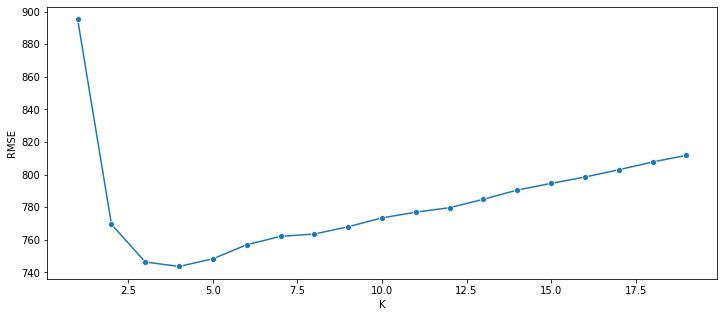

In [66]:
plt.figure(figsize = (12, 5))
sns.lineplot(x = "K", y = "RMSE", data = knn_error_df, marker = "o");

### Seems like K = 4 gives the least RMSE, lets see the exact value

In [67]:
print(f"RMSE: {knn_error_df['RMSE'][3]}")

RMSE: 743.6972257508008


In [68]:
# Fitting the model with k = 4 and predicting traffic volume
knn_reg = KNeighborsRegressor(n_neighbors = 4)
knn_reg.fit(X_train_knn_scaled, y_train_knn)
knn_reg_prediction = knn_reg.predict(X_test_knn_scaled)

In [69]:
accuracy = round(knn_reg.score(X_test_knn_scaled, y_test_knn) * 100, 3)
mae = round(mean_absolute_error(y_test_knn, knn_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test_knn, knn_reg_prediction)), 3)

In [70]:
# Let's add this result to a dataframe to keep track of results of different models
knn_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(knn_regressor_result, results_df, "KnnRegressor (Min-Max Scaled)")

In [71]:
results_df

,RandomForestRegressor,LinearRegressor,RidgeRegressor,LassoRegressor,KnnRegressor (Min-Max Scaled)
R2 score,95.990,16.478,16.478,16.379,86.166
MAE,218.669,1609.648,1609.697,1615.957,498.390
RMSE,400.397,1827.329,1827.333,1828.414,743.697


# KNN

Standard Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(label_encoded_features, labels, test_size=0.2, random_state = 42)

In [74]:
# Scaling using Standard scaler
scaler = StandardScaler()
X_train_knn_scaled = scaler.fit_transform(X_train_knn)
X_test_knn_scaled = scaler.fit_transform(X_test_knn)

In [75]:
# Finding the best k value using elbow method
rmse_arr = []

for k in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=k)

    model.fit(X_train_knn_scaled, y_train_knn)
    preds = model.predict(X_test_knn_scaled)

    error = np.sqrt(mean_squared_error(y_test_knn, preds))
    rmse_arr.append((k, error))

knn_error_df = pd.DataFrame(rmse_arr, index=range(len(rmse_arr)), columns=["K", "RMSE"])

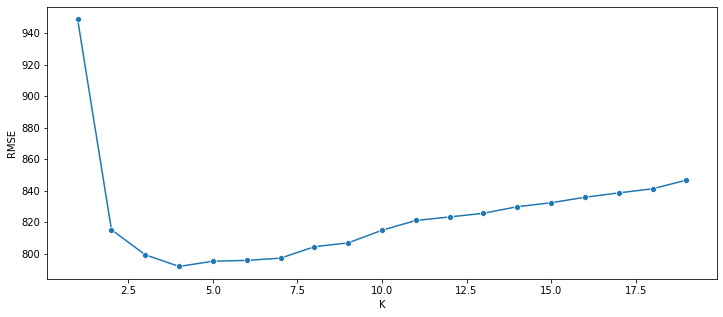

In [76]:
plt.figure(figsize = (12, 5))
sns.lineplot(x = "K", y = "RMSE", data = knn_error_df, marker = "o");

### Seems like K = 4 gives the least RMSE, lets see the exact value

In [77]:
print(f"RMSE: {knn_error_df['RMSE'][3]}")

RMSE: 791.9743273513657


In [78]:
# Fitting the model with k = 5 and predicting traffic volume
knn_reg = KNeighborsRegressor(n_neighbors = 4)
knn_reg.fit(X_train_knn_scaled, y_train_knn)
knn_reg_prediction = knn_reg.predict(X_test_knn_scaled)

In [79]:
accuracy = round(knn_reg.score(X_test_knn_scaled, y_test_knn) * 100, 3)
mae = round(mean_absolute_error(y_test_knn, knn_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test_knn, knn_reg_prediction)), 3)

In [80]:
# Let's add this result to a dataframe to keep track of results of different models
knn_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(knn_regressor_result, results_df, "KnnRegressor (Standard Scaled)")

In [81]:
results_df

,RandomForestRegressor,LinearRegressor,RidgeRegressor,LassoRegressor,KnnRegressor (Min-Max Scaled),KnnRegressor (Standard Scaled)
R2 score,95.990,16.478,16.478,16.379,86.166,84.311
MAE,218.669,1609.648,1609.697,1615.957,498.390,537.551
RMSE,400.397,1827.329,1827.333,1828.414,743.697,791.974


# Support Vector Regressor

Standard scaled

In [82]:
from sklearn.svm import SVR

In [83]:
# Splitting the data for SVR
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(label_encoded_features, labels, test_size = 0.2)

In [84]:
# Scaling using Standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_svr_scaled = scaler.fit_transform(X_train_svr)
X_test_svr_scaled = scaler.fit_transform(X_test_svr)

In [85]:
# Fitting and predicting traffic volume
svr_reg = SVR(kernel = "rbf")
svr_reg.fit(X_train_svr_scaled, y_train_svr)
svr_reg_prediction = svr_reg.predict(X_test_svr_scaled)

In [86]:
accuracy = round(svr_reg.score(X_test_svr_scaled, y_test_svr) * 100, 3)
mae = round(mean_absolute_error(y_test_svr, svr_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test_svr, svr_reg_prediction)), 3)

In [87]:
# Let's add this result to a dataframe to keep track of results of different models
svr_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(svr_regressor_result, results_df,"SvrRegressor (Standard Scaled)")

In [88]:
results_df

,RandomForestRegressor,LinearRegressor,RidgeRegressor,LassoRegressor,KnnRegressor (Min-Max Scaled),KnnRegressor (Standard Scaled),SvrRegressor (Standard Scaled)
R2 score,95.990,16.478,16.478,16.379,86.166,84.311,27.374
MAE,218.669,1609.648,1609.697,1615.957,498.390,537.551,1468.317
RMSE,400.397,1827.329,1827.333,1828.414,743.697,791.974,1686.404


# Support Vector Regressor

Min-Max-Scaled

In [89]:
from sklearn.svm import SVR

In [90]:
# Splitting the data for SVR
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(label_encoded_features, labels, test_size=0.2)

In [91]:
# Scaling using Standard scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_svr_scaled = scaler.fit_transform(X_train_svr)
X_test_svr_scaled = scaler.fit_transform(X_test_svr)

In [92]:
# Fitting and predicting traffic volume
svr_reg = SVR(kernel = "rbf")
svr_reg.fit(X_train_svr_scaled, y_train_svr)
svr_reg_prediction = svr_reg.predict(X_test_svr_scaled)

In [93]:
accuracy = round(svr_reg.score(X_test_svr_scaled, y_test_svr) * 100, 3)
mae = round(mean_absolute_error(y_test_svr, svr_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test_svr, svr_reg_prediction)), 3)

In [94]:
# Let's add this result to a dataframe to keep track of results of different models
svr_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(svr_regressor_result, results_df,"SvrRegressor (MinMax Scaled)")

In [95]:
results_df

,RandomForestRegressor,LinearRegressor,RidgeRegressor,LassoRegressor,KnnRegressor (Min-Max Scaled),KnnRegressor (Standard Scaled),SvrRegressor (Standard Scaled),SvrRegressor (MinMax Scaled)
R2 score,95.990,16.478,16.478,16.379,86.166,84.311,27.374,25.363
MAE,218.669,1609.648,1609.697,1615.957,498.390,537.551,1468.317,1513.478
RMSE,400.397,1827.329,1827.333,1828.414,743.697,791.974,1686.404,1721.857


# Decision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
# We will fit the decision tree regressor on X_train and y_trained created earlier
d_tree_reg = DecisionTreeRegressor()
d_tree_reg.fit(X_train, y_train)
d_tree_reg_prediction = d_tree_reg.predict(X_test)

In [107]:
accuracy = round(d_tree_reg.score(X_test, y_test) * 100, 3)
mae = round(mean_absolute_error(y_test, d_tree_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, d_tree_reg_prediction)), 3)

In [109]:
# Let's add this result to a dataframe to keep track of results of different models
d_tree_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(d_tree_regressor_result, results_df,"DecisionTreeRegressor")

In [110]:
results_df

,RandomForestRegressor,LinearRegressor,RidgeRegressor,LassoRegressor,KnnRegressor (Min-Max Scaled),KnnRegressor (Standard Scaled),SvrRegressor (Standard Scaled),SvrRegressor (MinMax Scaled),DecisionTreeRegressor
R2 score,95.990,16.478,16.478,16.379,86.166,84.311,27.374,25.363,92.308
MAE,218.669,1609.648,1609.697,1615.957,498.390,537.551,1468.317,1513.478,266.509
RMSE,400.397,1827.329,1827.333,1828.414,743.697,791.974,1686.404,1721.857,554.557


# Polynomial Regression

In [123]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [146]:
poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [147]:
lin_reg_p = LinearRegression()
lin_reg_p.fit(X_train_poly, y_train)
lin_reg_p_prediction = lin_reg_p.predict(X_test_poly)

In [148]:
lin_reg_p_prediction

array([5706.08712301, 4194.8731406 , 5610.33311428, ..., 4424.1592642 ,
       3089.08217087, 3531.54061384])

In [149]:
accuracy = round(lin_reg_p.score(X_test_poly, y_test) * 100, 3)
mae = round(mean_absolute_error(y_test, lin_reg_p_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, lin_reg_p_prediction)), 3)

In [153]:
# Let's add this result to a dataframe to keep track of results of different models
polynomial_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(polynomial_regressor_result, results_df,"PolynomialRegressor (deg = 3)")

In [154]:
results_df

,RandomForestRegressor,LinearRegressor,RidgeRegressor,LassoRegressor,KnnRegressor (Min-Max Scaled),KnnRegressor (Standard Scaled),SvrRegressor (Standard Scaled),SvrRegressor (MinMax Scaled),DecisionTreeRegressor,PolynomialRegressor (deg = 3)
R2 score,95.990,16.478,16.478,16.379,86.166,84.311,27.374,25.363,92.308,75.042
MAE,218.669,1609.648,1609.697,1615.957,498.390,537.551,1468.317,1513.478,266.509,772.988
RMSE,400.397,1827.329,1827.333,1828.414,743.697,791.974,1686.404,1721.857,554.557,998.892


# XGBoost

In [155]:
from xgboost import XGBRegressor

In [162]:
xgb_reg = XGBRegressor(objective = "reg:squarederror", n_estimators = 1000, random_state = 42, n_jobs = -1)
xgb_reg.fit(X_train, y_train, early_stopping_rounds = 10, eval_set = [(X_test, y_test)], verbose = 1)

[0]	validation_0-rmse:2720.71875
[1]	validation_0-rmse:1946.04150
[2]	validation_0-rmse:1415.86536
[3]	validation_0-rmse:1059.59912
[4]	validation_0-rmse:829.20544
[5]	validation_0-rmse:679.47937
[6]	validation_0-rmse:588.39355
[7]	validation_0-rmse:534.61084
[8]	validation_0-rmse:504.86636
[9]	validation_0-rmse:484.87656
[10]	validation_0-rmse:472.29712
[11]	validation_0-rmse:464.88983
[12]	validation_0-rmse:456.30731
[13]	validation_0-rmse:452.84418
[14]	validation_0-rmse:449.44830
[15]	validation_0-rmse:444.03037
[16]	validation_0-rmse:437.30835
[17]	validation_0-rmse:434.17014
[18]	validation_0-rmse:431.40552
[19]	validation_0-rmse:429.12149
[20]	validation_0-rmse:427.85089
[21]	validation_0-rmse:426.69113
[22]	validation_0-rmse:424.83832
[23]	validation_0-rmse:424.05917
[24]	validation_0-rmse:423.45486
[25]	validation_0-rmse:422.63834
[26]	validation_0-rmse:421.08878
[27]	validation_0-rmse:419.72842
[28]	validation_0-rmse:418.55106
[29]	validation_0-rmse:418.34717
[30]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
xgb_reg_prediction = xgb_reg.predict(X_test)

In [165]:
accuracy = round(xgb_reg.score(X_test, y_test) * 100, 3)
mae = round(mean_absolute_error(y_test, xgb_reg_prediction), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, xgb_reg_prediction)), 3)

In [170]:
# Let's add this result to a dataframe to keep track of results of different models
xgb_regressor_result = [accuracy, mae, rmse]
add_to_dataframe(xgb_regressor_result, results_df,"XGBoostRegressor")

In [171]:
results_df

,RandomForestRegressor,LinearRegressor,RidgeRegressor,LassoRegressor,KnnRegressor (Min-Max Scaled),KnnRegressor (Standard Scaled),SvrRegressor (Standard Scaled),SvrRegressor (MinMax Scaled),DecisionTreeRegressor,PolynomialRegressor (deg = 3),XGBoostRegressor
R2 score,95.990,16.478,16.478,16.379,86.166,84.311,27.374,25.363,92.308,75.042,96.304
MAE,218.669,1609.648,1609.697,1615.957,498.390,537.551,1468.317,1513.478,266.509,772.988,228.209
RMSE,400.397,1827.329,1827.333,1828.414,743.697,791.974,1686.404,1721.857,554.557,998.892,384.377


In [226]:
results_df = results_df.transpose()

# Comparing R2 Score of all the models

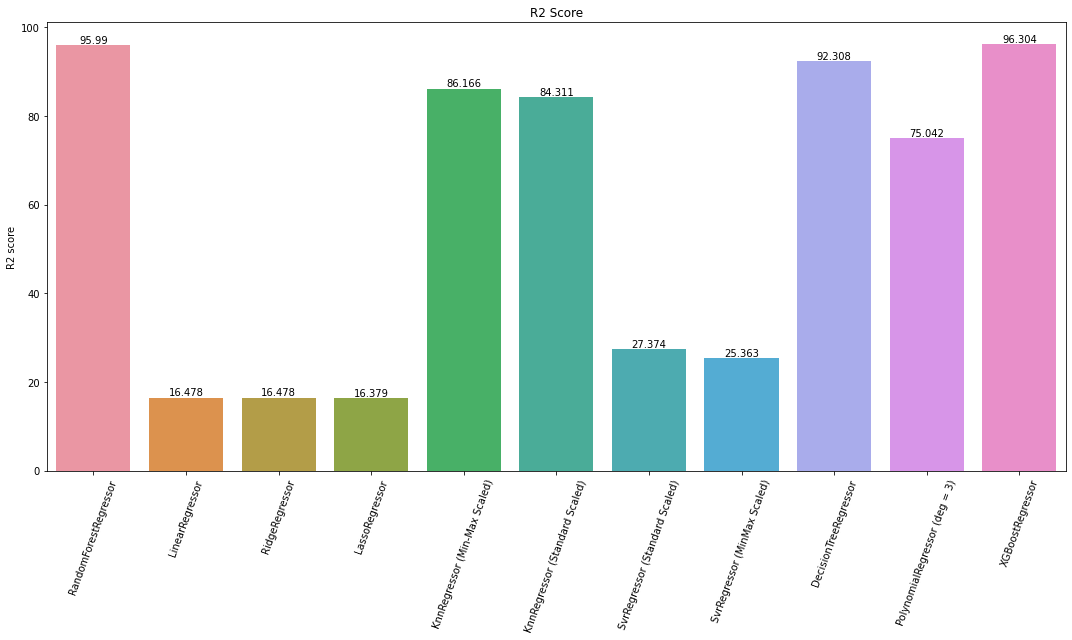

In [228]:
plt.figure(figsize = (15, 9))
ax = sns.barplot(x = results_df.index, y = results_df['R2 score'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 70)
plt.title("R2 Score")
plt.tight_layout()

# Comparing Root Mean Square Error (RMSE) of all the models

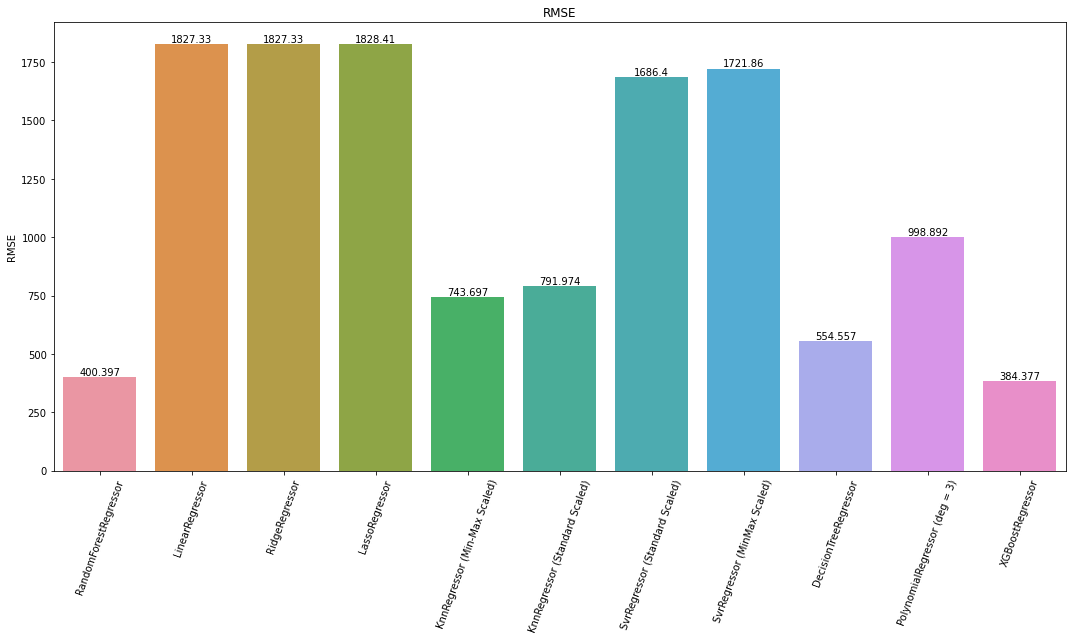

In [230]:
plt.figure(figsize = (15, 9))
ax = sns.barplot(x = results_df.index, y = results_df['RMSE'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 70)
plt.title("RMSE")
plt.tight_layout()

# Comparing Mean Square Error (MSE) of all the models

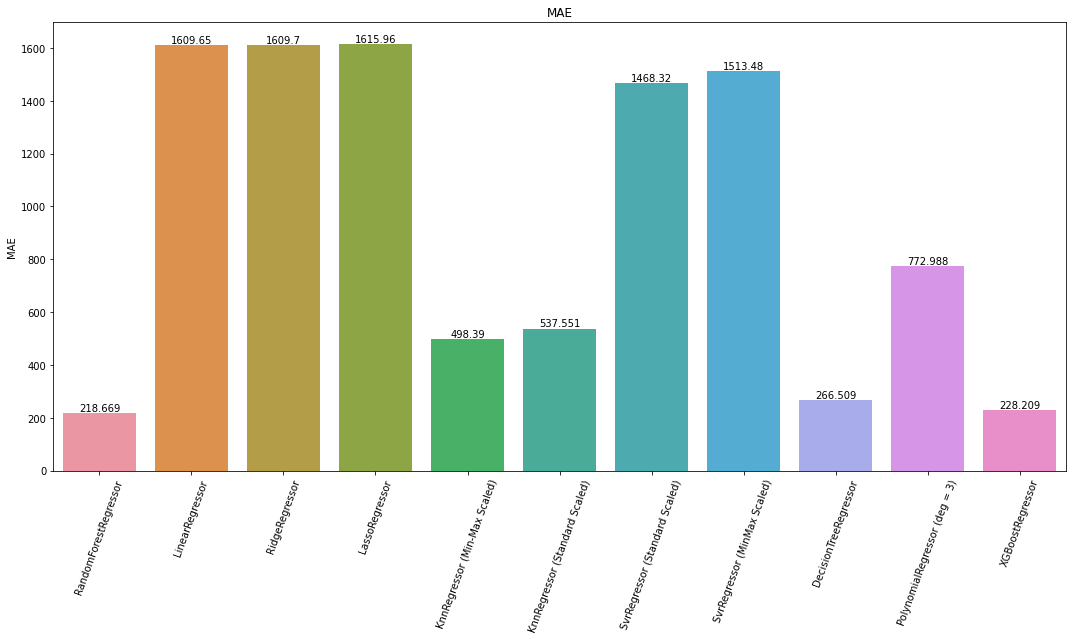

In [229]:
plt.figure(figsize = (15, 9))
ax = sns.barplot(x = results_df.index, y = results_df['MAE'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 70)
plt.title("MAE")
plt.tight_layout()